<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/EDA_for_PUBG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is not totally my work. I am following some legends of eda and following there work to know new skills 

[*Source*](https://kaggle.com/deffro/eda-is-fun)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
%ls

gender_submission.csv  sample_submission_V2.csv  test_V2.csv  train_V2.csv
kaggle.json            test.csv                  train.csv


In [6]:
!kaggle competitions download -c pubg-finish-placement-prediction

 98% 238M/244M [00:02<00:00, 130MB/s]
100% 244M/244M [00:02<00:00, 99.3MB/s]
 65% 11.0M/17.0M [00:00<00:00, 20.9MB/s]
100% 17.0M/17.0M [00:00<00:00, 31.4MB/s]
 91% 91.0M/100M [00:00<00:00, 103MB/s] 
100% 100M/100M [00:01<00:00, 104MB/s] 


In [7]:
!unzip \*.zip&& rm *.zip

Archive:  train_V2.csv.zip
replace train_V2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Archive:  sample_submission_V2.csv.zip

Archive:  test_V2.csv.zip

3 archives were successfully processed.


In [8]:
%ls 

gender_submission.csv  sample_submission_V2.csv  test_V2.csv  train_V2.csv
kaggle.json            test.csv                  train.csv


In [9]:
train = pd.read_csv('./train_V2.csv')
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

You must create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place).

## Data fields
- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an - Elo ranking where only kills matter.) If there is a value other than -1 in - rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [10]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
# killers
print("The Average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {} .".format(train['kills'].mean(), train['kills'].quantile(0.99), train['kills'].max()))

The Average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72 .


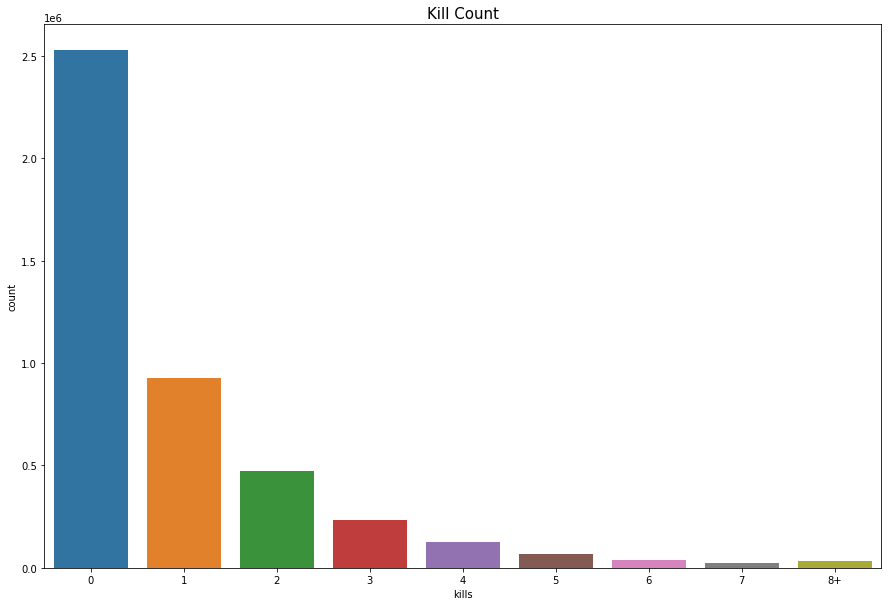

In [12]:
#let's plot the kill count 
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count', fontsize=15)
plt.show()

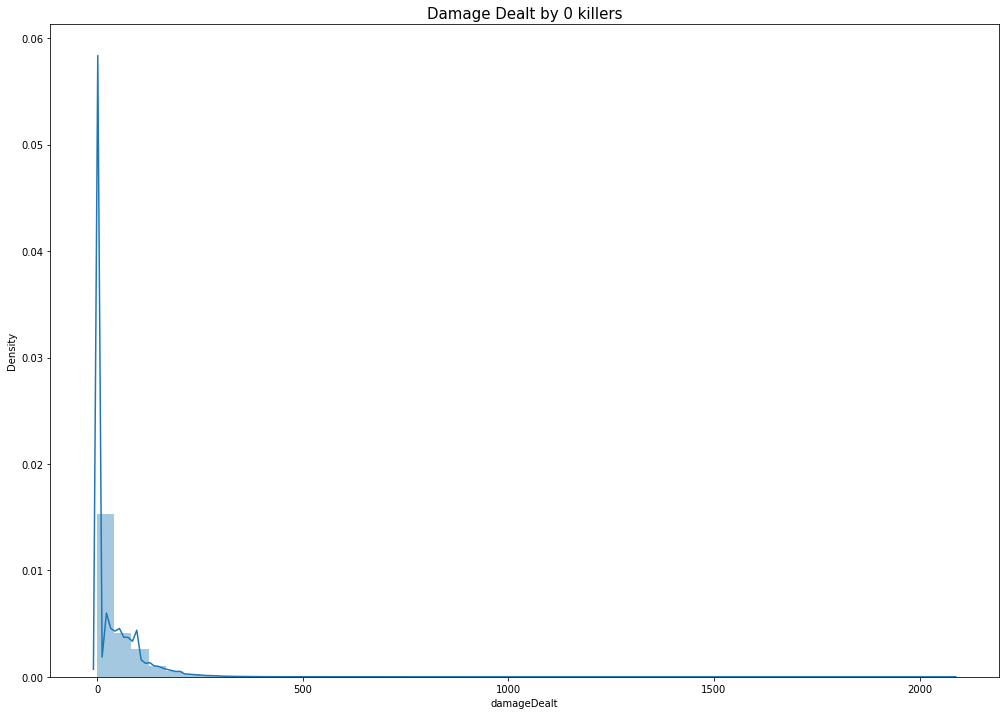

In [13]:
# most people can't makke a single kill. Atleast do they do damage? 
data = train.copy()
data = data[data['kills'] == 0]
plt.figure(figsize=(17, 12))
plt.title("Damage Dealt by 0 killers", fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

- most of them don't. 

In [14]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc'] == 1])/ len(train)))

data1= train[train['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage !".format(len(data1[data1['winPlacePerc'] == 1]), 100 * len(data1[data1['winPlacePerc'] == 1])/ len(train)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage !


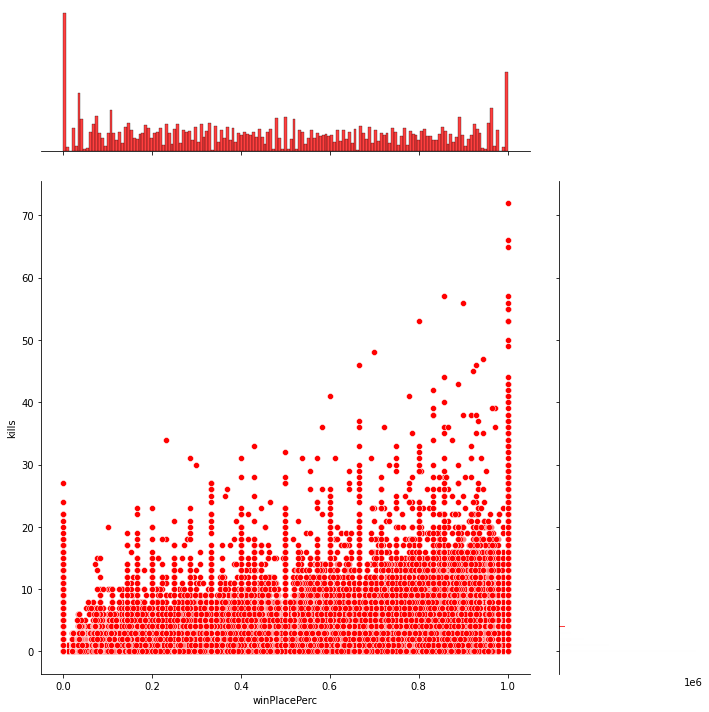

In [15]:
# plot win placement percentage vs kills

sns.jointplot(x='winPlacePerc', y='kills', data=train, height=10, ratio=3,
              color='r')
plt.show()

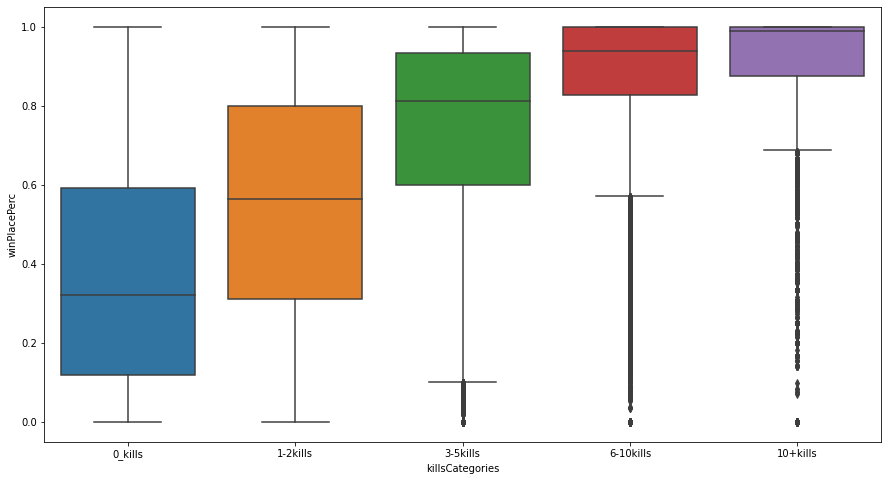

In [16]:
# let's group players based on kills (0kills , 1-2kills, 3-5kills, 6-10kills & 10+ kills).

kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1,0, 2, 5, 10, 60],
                                  labels = ['0_kills', '1-2kills', '3-5kills',
                                            '6-10kills', '10+kills'])
plt.figure(figsize=(15, 8))
sns.boxplot(x='killsCategories', y="winPlacePerc", data=kills)
plt.show()

In [17]:
print("The Average person walks for {:.1f}m, 99% of people have walked {}m or less while the marathoner champion walked for {}m .".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The Average person walks for 1154.2m, 99% of people have walked 4396.0m or less while the marathoner champion walked for 25780.0m .


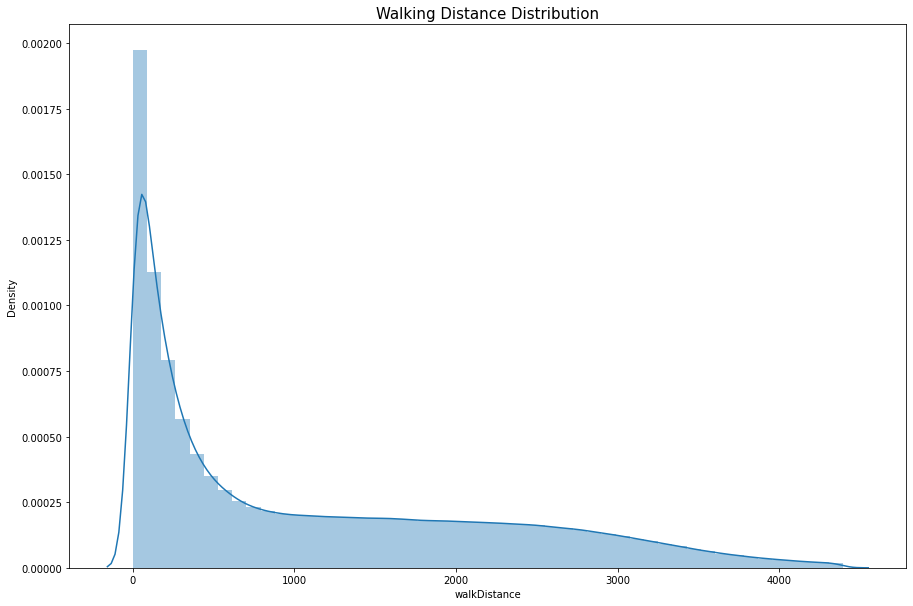

In [18]:
data = train.copy()
data = data[data['walkDistance'] < data['walkDistance'].  quantile(0.99)]
plt.figure(figsize=(15, 10))
plt.title("Walking Distance Distribution", fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [19]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a\nstep or they are afk (More possible).".format(len(data[data['walkDistance'] == 0]), 100 * len(data1[data1['walkDistance']==0])/ len(train)))

99603 players (2.0329%) walked 0 meters. This means that they die before even taking a
step or they are afk (More possible).


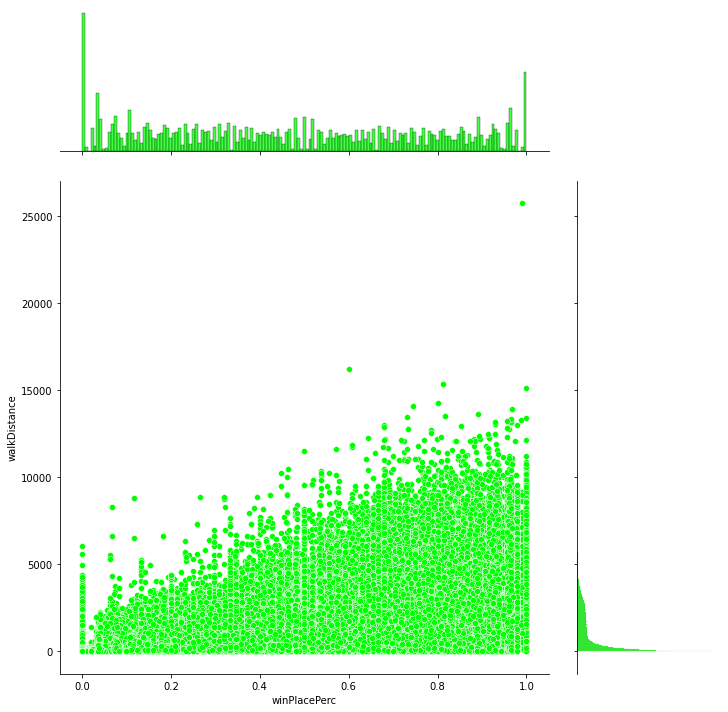

In [20]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=train, height=10, ratio=3, color='lime')
plt.show()

In [21]:
 print("The Average person drives for {:.1f}m, 99% of people have drived {}m or less while the formula 1 champion drived for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The Average person drives for 606.1m, 99% of people have drived 6966.0m or less while the formula 1 champion drived for 40710.0m.


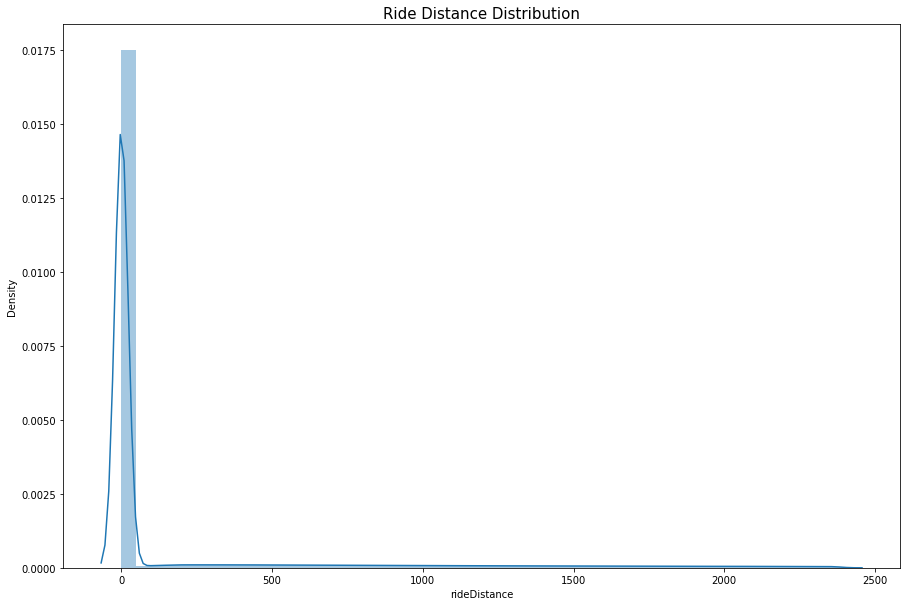

In [22]:
data = train.copy()
data = data[data['rideDistance']< train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title('Ride Distance Distribution', fontsize=15)
sns.distplot(data['rideDistance'])

In [23]:
#sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10,ratio=3, color='r')


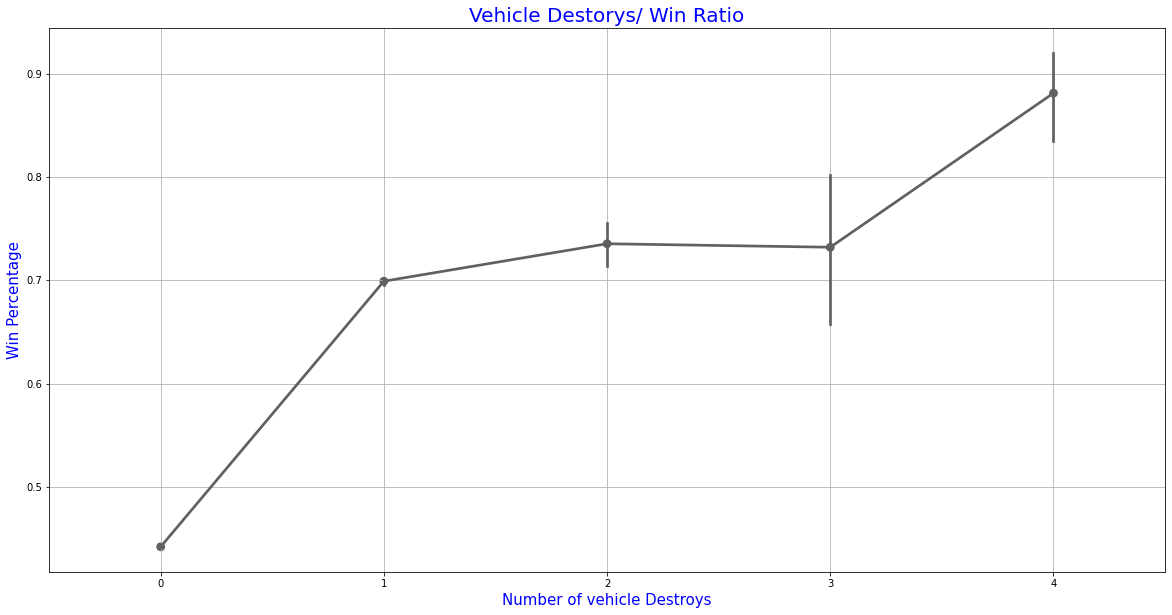

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data, color="#606060",alpha=0.8)
plt.xlabel('Number of vehicle Destroys', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('Vehicle Destorys/ Win Ratio', fontsize=20, color='blue')
plt.grid()
plt.show()

In [25]:
# The Swimmers 
print("The Average person swims for {:.1f}m, 99% of people have swimmed {}m or less, while the olympic champion swimmed for {}m".format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The Average person swims for 4.5m, 99% of people have swimmed 123.0m or less, while the olympic champion swimmed for 3823.0m


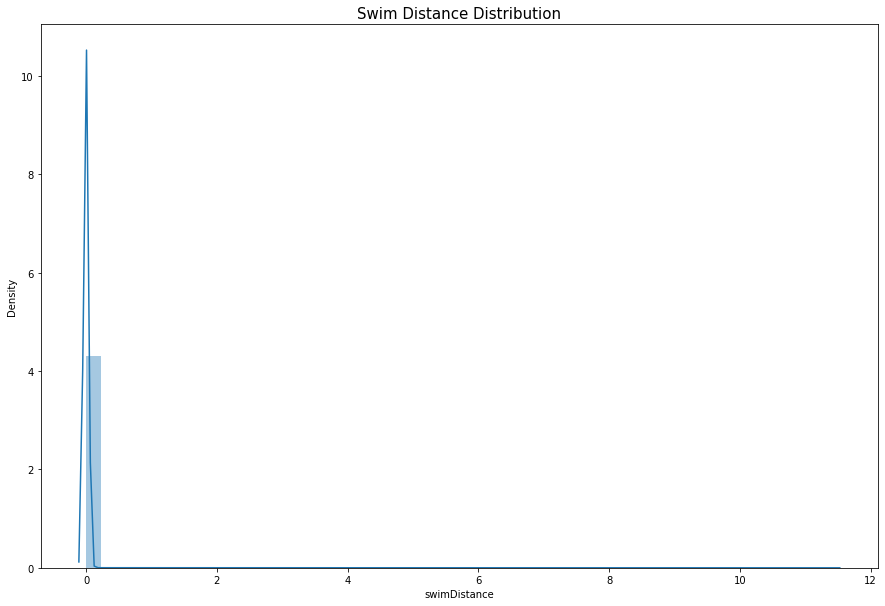

In [26]:
# check the swimmers distance distribution 
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15, 10))
plt.title("Swim Distance Distribution", fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

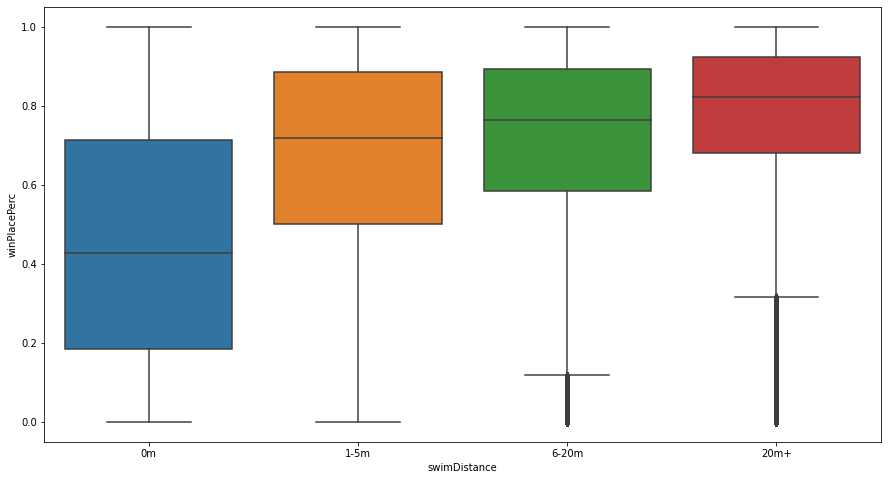

In [28]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0 , 5, 20, 5286], labels = ['0m', '1-5m', '6-20m', '20m+'])
plt.figure(figsize=(15, 8))
sns.boxplot(x='swimDistance', y='winPlacePerc', data=swim)

plt.show()

It seems that if you swim, you rise to the top in PUBG there are currently 3 maps. One of them has almost no water. Keep that in mind.

In [29]:
# THE HEALERS

print("THe Average Person uses {:.1f}m heal items, 99% of people uses {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))

THe Average Person uses 1.4m heal items, 99% of people uses 12.0 or less, while the doctor used 80.
